In [ ]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt

/tmp/ipykernel_2860/677469866.py:14: RuntimeWarning: overflow encountered in exp
  Ed = f_t * (Rsol / Dsol) ** 2 * c1 / (lam ** 5 * (np.exp(c2 / (lam * T)) - 1.0))


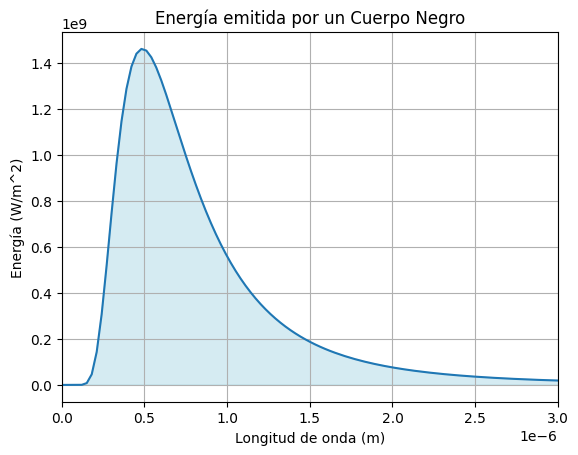

In [29]:
# Gráfica de Resultados de la transferencia de energía
def f(lam, phi, theta):
    c1 = 3.747e-16  # 2*pi*h*c*c [Wm^2]
    c2 = 1.4e-2     # h*c/k [mK] 
    Rsol = 6.96392e8  # Radio solar [m]
    Dsol = 1.496e11   # Distancia Tierra-Sol [m]
    T = 5782        # Temperatura superficial [K]
    f_t = np.cos(theta) * np.sin(phi)
    
    # Utilizar una versión segura de la exponencial para evitar desbordamientos
    Ed = f_t * (Rsol / Dsol) ** 2 * c1 / (lam ** 5 * (np.exp(c2 / (lam * T)) - 1.0))
    return Ed

# Definir el rango de longitud de onda
lam_range = np.linspace(0.1e-8, 3000e-8, 1000)

# Definir ángulos para phi y theta
phi = np.pi / 2.0  # Ángulo phi constante
theta = np.pi / 4.0  # Ángulo theta constante

# Evaluar la función f para cada longitud de onda en el rango especificado
energy = f(lam_range, phi, theta)

# Graficar f(lam, phi, theta) en función de la longitud de onda
plt.plot(lam_range, energy)
plt.fill_between(lam_range, energy, color='lightblue', alpha=0.5)  # Sombreado de la región interna
plt.xlabel('Longitud de onda (m)')
plt.xlim(0,0.3e-5)
plt.ylabel('Energía (W/m^2)')
plt.title('Energía emitida por un Cuerpo Negro')
plt.grid(True)
plt.show()

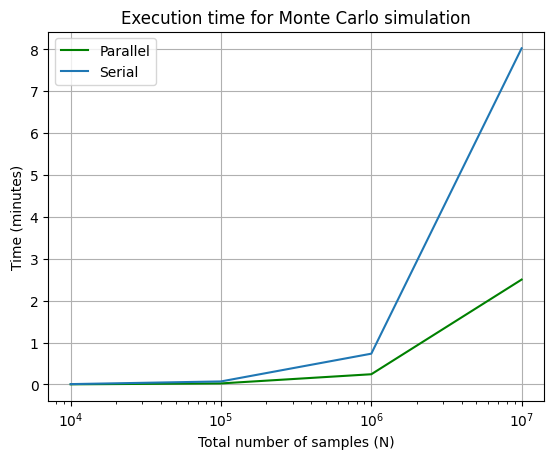

In [34]:
# Cargar los datos paralelos
parallel_results = np.load('parallel_results.npy')

# Extraer los valores de N y los tiempos paralelos
N_values = parallel_results[:, 0]
time_parallel = parallel_results[:, 2]

# Cargar los datos seriales
serial_results = np.load('serial_results.npy')

# Extraer los tiempos seriales
time_serial = serial_results[:, 2]

# Plot results
plt.plot(N_values, time_parallel, label='Parallel', color='g')
plt.plot(N_values, time_serial, label='Serial')
plt.xlabel('Total number of samples (N)')
plt.ylabel('Time (minutes)')
plt.title('Execution time for Monte Carlo simulation')
plt.xscale('log')  # Cambio a escala logarítmica en el eje x
plt.legend()
plt.grid(True)
plt.show()